# Homework 1: Analyzing Stop-and-Frisk Data

**STOP**

If you haven't already, please make a copy of this notebook and save to your google drive.
This is imperative so that your work is saved as you go.

**Due Date**: Thursday April 10th at 11:59pm.

**Submission Instructions**:
- Download the notebook: Go to File --> Download --> Download .ipynb
- Upload the notebook: Click the Files icon (left side under the Key icon) --> Click the Upload icon (left most of 4) --> Select the file you just downloaded.
- Make sure your file is named "HW1.ipynb"
- Run the last cell in this notebook.
- Find the new pdf file in the same location as your uploaded notebook.
- Click the 3 vertical dots for this pdf file --> Click Download.
- IMPORTANT: check that your pdf file has not cut off any work from your notebook.
- Upload the pdf to Gradescope.

**Learning Outcomes**:
- Using Python for exploratory data analysis.
- Calculating descriptive statistics with pandas.
- Making informative plots using matplotlib/seaborn.

## Plot Presentation Link

Please put a link to your plot presentation here! Remember to make sure that the link is publicly accessible.

Answer here!

## Stop-and-Frisk Data

In this homework, we will focus on analyzing stop-and-frisk data from New York Data.
The below code reads in the dataset into a pandas Dataframe.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
data = pd.read_parquet("https://github.com/stanford-mse-125-2025/mse-125-2025-public/raw/refs/heads/main/data/stops.parquet")
data

,frisked,found_weapon,race,suspected_crime,is_cpw,radio_run,inside_outside,location_housing,stopped_bc_object,stopped_bc_desc,...,additional_time,additional_sights,additional_other,date,month,hour,precinct,n_stop_reasons,subject_sex,subject_age_bin
0,True,False,Black,cpw,True,False,False,neither,False,True,...,False,False,False,2008-01-01,1,2,25,3,male,"(18,25]"
1,False,False,Hispanic,burglary,False,True,True,neither,False,False,...,False,False,False,2008-01-01,1,21,66,1,male,"(18,25]"
2,True,False,Black,robbery,False,False,False,housing,False,True,...,True,False,False,2008-01-08,1,2,58,1,male,"(0,18]"
3,True,False,Black,robbery,False,False,False,neither,False,False,...,False,False,False,2008-01-08,1,20,61,2,male,"(18,25]"
4,False,False,Black,criminal trespass,False,False,True,housing,False,False,...,True,False,False,2008-01-12,1,22,44,2,male,"(0,18]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216113,True,False,Hispanic,cpw,True,True,False,neither,False,False,...,True,False,False,2011-12-31,12,24,73,2,male,"(18,25]"
2216114,True,False,Black,cpw,True,False,False,housing,False,False,...,False,False,False,2011-12-31,12,24,14,1,male,"(18,25]"
2216115,True,False,Black,cpw,True,False,False,neither,False,False,...,True,False,False,2011-12-31,12,24,23,1,male,"(18,25]"
2216116,True,False,Black,cpw,True,False,False,neither,False,False,...,True,False,False,2011-12-31,12,24,23,1,male,"(18,25]"


## Exercise 0

Give some background on the data below. What is a frisk? What insights could we potentially uncover from this dataset?

A frisk is when a police officer physically stops and checks someone to see if they're in compliance with laws. We will uncover how police view certain groups as more "suspicious" than others.

## Exercise 1

Answer the following questions by outputting the answer using python code:

**Part (a)**: How many stops are recorded in the dataset?

In [4]:
num_rows = len(data)
print(num_rows)

2216118


**Part (b)**: When was the oldest stop in the dataset? When was the most recent stop?

In [8]:
print("Oldest is ", min(data["date"]))
print("Newest is ", max(data["date"]))

Oldest is  2008-01-01
Newest is  2011-12-31


**Part (c)**: What were the 3 most common suspected crimes that drivers are being stopped for? What percent of stops do each of these account for?

In [18]:
most_common = data["suspected_crime"].value_counts()
print(most_common[:3])
print(most_common[:3] / len(data))

suspected_crime
cpw                  595487
robbery              378631
criminal trespass    229846
Name: count, dtype: int64
suspected_crime
cpw                  0.268707
robbery              0.170853
criminal trespass    0.103716
Name: count, dtype: float64


**Part (d)**

For the 3 most common suspected crimes from part (c), make a plot that shows how their frequencies (percent of all stops) change over different years recorded in the dataset.
Your plot should be clear to understand, including having easily understandable axis labels.

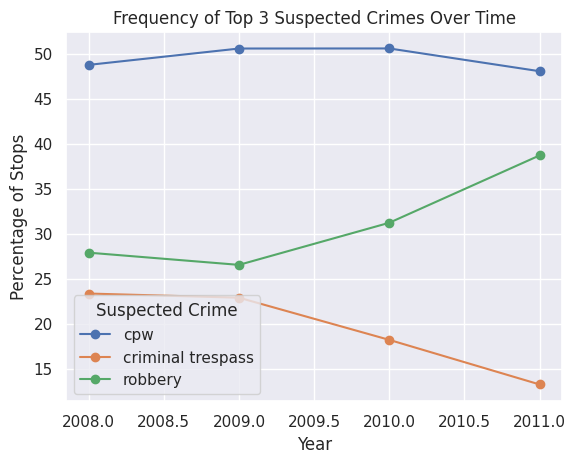

In [24]:
import matplotlib.pyplot as plt
# Create a new column for the year of the stop
data['year'] = pd.DatetimeIndex(data['date']).year

# Filter data for the 3 most frequent suspected crimes
top_crimes = most_common[:3].index
filtered_data = data[data['suspected_crime'].isin(top_crimes)]

# Group by year and suspected crime, calculate the frequency
crime_frequency = filtered_data.groupby(['year', 'suspected_crime'])['suspected_crime'].count().unstack()

# Calculate the percentage of each crime per year
crime_percentage = crime_frequency.div(crime_frequency.sum(axis=1), axis=0) * 100

# Create the plot
crime_percentage.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Percentage of Stops')
plt.title('Frequency of Top 3 Suspected Crimes Over Time')
plt.legend(title='Suspected Crime')
plt.grid(True)
plt.show()


## Exercise 2

**Part (a)**: Make a plot that breaks down the percentage of stops by race.

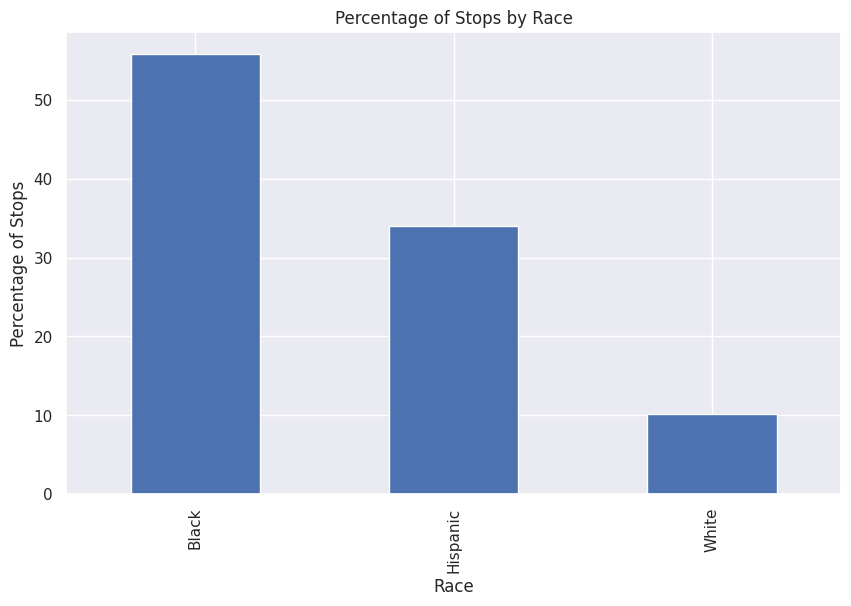

In [28]:
# Calculate the percentage of stops by race
race_percentage = data['race'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(10, 6))
race_percentage.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Percentage of Stops')
plt.title('Percentage of Stops by Race')
plt.show()


**Part (b)**: What can you conclude from this data? What is still unclear from this data?

This shows that the majority of stops are conducted on Black people with Hispanics second most likely and White least likely. Although I doubt ~10% of the NYC is white, we still should have data to compare the frisk likelihood to the general population to make conclusions.

## Exercise 3

Below is some data from the 2010 census stratified by race:

In [29]:
census = pd.DataFrame({
    "Population": [1776891, 2490350, 2719856],
    "race": ["Black", "Hispanic", "White"]
})
census["Percent_of_Population"] = census["Population"] / census["Population"].sum()
census

,Population,race,Percent_of_Population
0,1776891,Black,0.254310
1,2490350,Hispanic,0.356421
2,2719856,White,0.389268


**Part (a)**: Find the ratio of the fraction of stopped individuals from each race to the fraction of residents in NYC from each race (Hint: use a merge).

In [36]:
# Merge the two dataframes
merged_data = pd.merge(race_percentage.reset_index(), census, on="race")
merged_data['proportion'] = merged_data['proportion'] / 100

# Calculate the ratio
merged_data["Ratio"] = merged_data["proportion"] / merged_data["Percent_of_Population"]

# Display the result
merged_data


,race,proportion,Population,Percent_of_Population,Ratio
0,Black,0.558395,1776891,0.254310,2.195722
1,Hispanic,0.339851,2490350,0.356421,0.953511
2,White,0.101754,2719856,0.389268,0.261397


**Part (b)**: How does this change what we can conclude?

Yes, we now see that Black people are frisked at a rate over twice what should be expected and white people at a rate about 1/4 of expected.

## Exercise 4

**Part (a)**: For each race, calculate the frisk rate = percent of stops that result in frisk.

In [39]:
frisk_rate_by_race = data.groupby("race")["frisked"].mean()

# Optional: Convert to percentage and display
frisk_rate_by_race = frisk_rate_by_race * 100
print(frisk_rate_by_race)


race
Black       57.29986
Hispanic    58.41073
White       44.04518
Name: frisked, dtype: float64


**Part (b)**: For each race, calculate the hit rate = percent of frisks that result in a weapon recovery.

In [41]:
# Filter rows where a frisk was conducted
frisks = data[data["frisked"] == True]

# Group by race and calculate the hit rate
hit_rate_by_race = frisks.groupby("race")["found_weapon"].mean() * 100  # Convert to percentage

# Display the hit rates
print(hit_rate_by_race)


race
Black       1.825495
Hispanic    2.113107
White       3.708179
Name: found_weapon, dtype: float64


**Part (c)**: What are some new conclusions we can draw from these computations?

Black and Hispanic people are more likely to be stopped and more likely to be frisked than white people; however, white people are more likely to have a weapon found as a result of being frisked.

## Exercise 5

**Part (a)**: Make a plot that compares the frisk rate for blacks to the frisk rate for whites for each precinct.

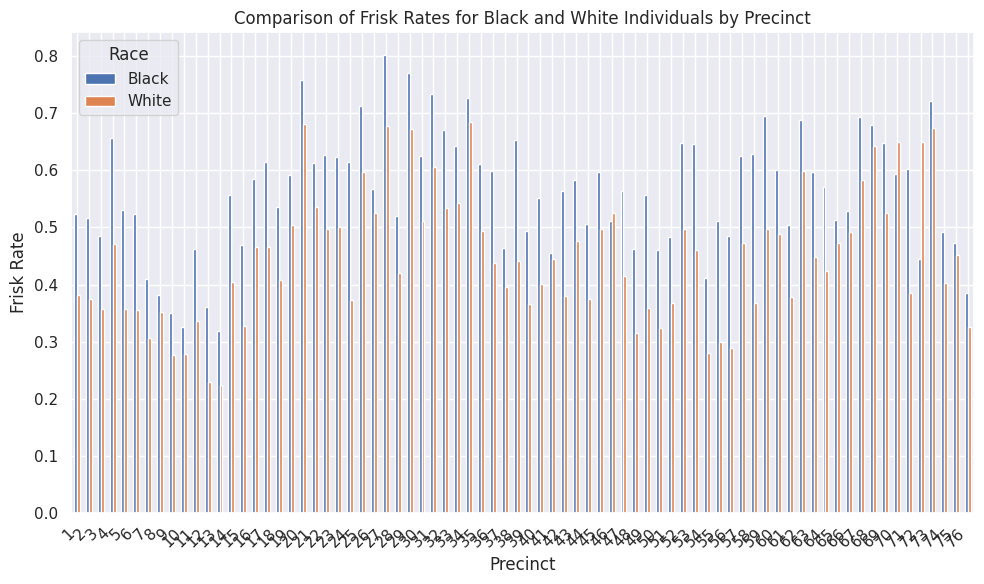

In [42]:
# Filter data for Black and White races
filtered_data = data[data['race'].isin(['Black', 'White'])]

# Group data by precinct and race, then calculate the frisk rate
frisk_rate = filtered_data.groupby(['precinct', 'race'])['frisked'].mean().unstack()

# Create the plot
frisk_rate.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Precinct')
plt.ylabel('Frisk Rate')
plt.title('Comparison of Frisk Rates for Black and White Individuals by Precinct')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Race')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


**Part (b)**: Write at least one sentence that interprets your plot from Part (b)

Answer here!


**Part (c)**: Repeat part (a) but for hit rate instead of frisk rate.

In [ ]:
# Code here!
# --------------------------------- #



# --------------------------------- #

**Part (d)**: Write at least one sentence that interprets your plot from Part (c)

Answer here!

## Converting to PDF

Use the below cell to convert your notebook to pdf, using the instructions at the beginning of the notebook.

In [ ]:
!apt-get install -qq pandoc texlive texlive-xetex texlive-latex-extra > /dev/null 2>&1
!jupyter nbconvert --to latex "/content/HW1.ipynb" > /dev/null 2>&1
!sed -i 's/❗/!/g' /content/HW1.tex
!pdflatex -interaction=nonstopmode -halt-on-error -quiet "/content/HW1.tex" > /dev/null 2>&1
